In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

import plotly.express as px

import json
import pickle


## 1) Problem Statment

In [2]:
# To predict the House price using Features

## 2) Data Gathering & Data Validation

In [9]:
boston_data = load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df["Price"] = boston_data.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 3) EDA

## 3.1 CRIM

In [10]:
df["CRIM"].value_counts()

0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: CRIM, Length: 504, dtype: int64

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM'>

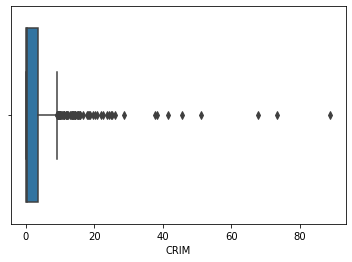

In [12]:
sns.boxplot(df["CRIM"])

In [13]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## Train Test Split

In [16]:
x = df.drop("Price",axis=1)
y = df["Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=45)

## Model Training

In [24]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

## Evaluation

In [19]:

# Testing
y_pred_test = knn_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
print("*"*20)

mae = mean_absolute_error(y_test,y_pred_test)
print("MAE",mae)
print("*"*20)
R2_SCORE = r2_score(y_test,y_pred_test)
print("R2_score",R2_SCORE)

MSE 50.502305263157886
********************
MAE 5.098421052631579
********************
R2_score 0.47712788015961294


In [20]:
# Training
y_pred_train = knn_reg.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
print("*"*20)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE",mae)
print("*"*20)
R2_SCORE = r2_score(y_train,y_pred_train)
print("R2_score",R2_SCORE)

MSE 25.331198870056497
********************
MAE 3.4637853107344636
********************
R2_score 0.6801207607707431


## Linear Regression

In [21]:
lr_reg = LinearRegression()
lr_reg.fit(x_train,y_train)

LinearRegression()

In [23]:
# Training
y_pred_train = lr_reg.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
print("*"*20)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE",mae)
print("*"*20)
R2_SCORE = r2_score(y_train,y_pred_train)
print("R2_score",R2_SCORE)

MSE 21.0891518209497
********************
MAE 3.1563124523249786
********************
R2_score 0.7336888050549404


## Hyper Parameter Tuning

Text(0.5, 1.0, 'Comparison Between Train and Test Accuracies')

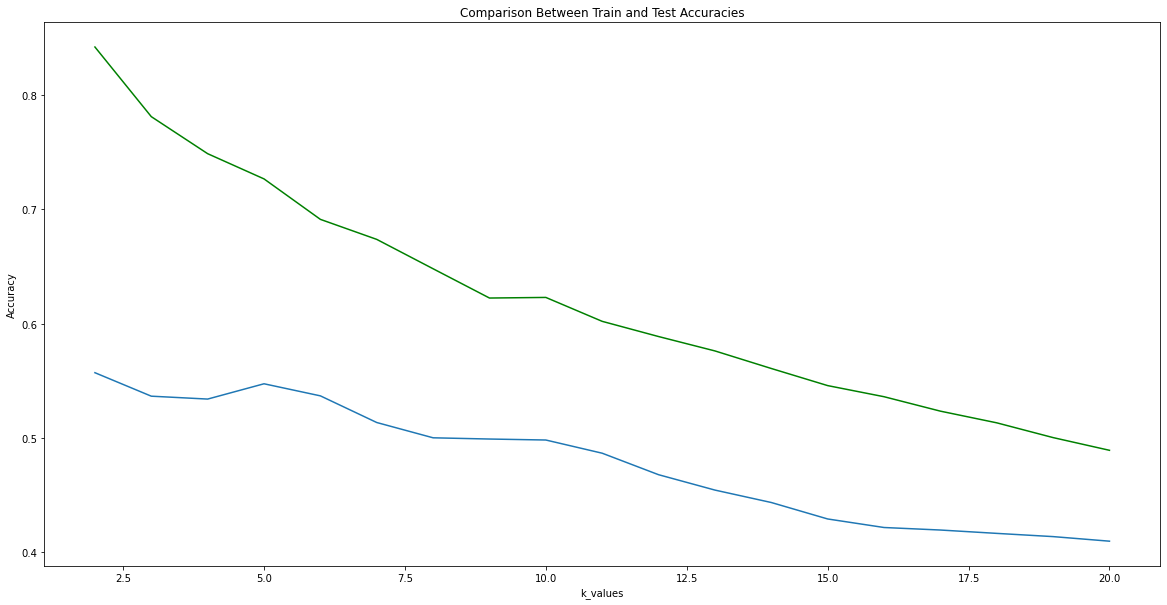

In [34]:
# knn_reg = KNeighborsRegressor()
# knn_reg.fit(x_train,y_train)
r2_train_list = []
r2_test_list  = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1) # MD
    knn_reg.fit(x_train,y_train)
    ## Training
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    ## Testing
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color = "Green")
plt.plot(k_values,r2_test_list)
plt.xlabel("k_values")
plt.ylabel("Accuracy")
plt.title("Comparison Between Train and Test Accuracies")

Text(0.5, 1.0, 'Comparison Between Train and Test Accuracies')

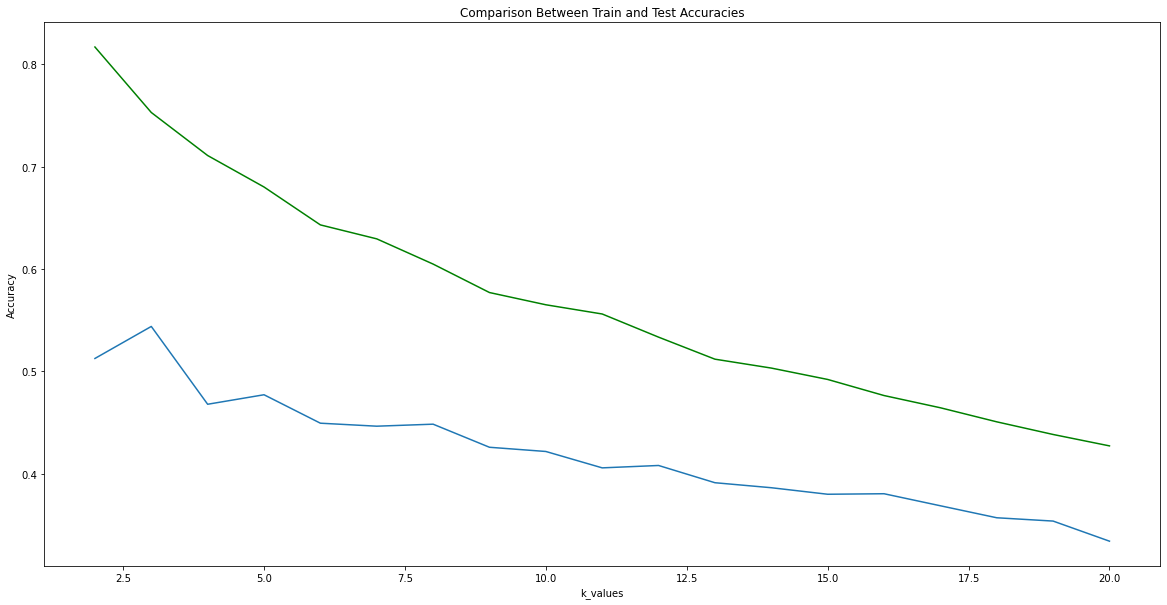

In [35]:
# knn_reg = KNeighborsRegressor()
# knn_reg.fit(x_train,y_train)
r2_train_list = []
r2_test_list  = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2) # MD
    knn_reg.fit(x_train,y_train)
    ## Training
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    ## Testing
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color = "Green")
plt.plot(k_values,r2_test_list)
plt.xlabel("k_values")
plt.ylabel("Accuracy")
plt.title("Comparison Between Train and Test Accuracies")

## Feature Scaling

In [31]:
x = df.drop("Price",axis=1)
y = df["Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=45)

In [32]:
x_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
48,0.25387,0.0,6.91,0.0,0.4480,5.399,95.3,5.8700,3.0,233.0,17.9,396.90,30.81
64,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05
473,4.64689,0.0,18.10,0.0,0.6140,6.980,67.6,2.5329,24.0,666.0,20.2,374.68,11.66
485,3.67367,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58
228,0.29819,0.0,6.20,0.0,0.5040,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92


## 1. Normalization

In [48]:
normal_scalar = MinMaxScaler()
normal_scalar.fit(x_train)
array = normal_scalar.transform(x_train)
normal_train_df = pd.DataFrame(array,columns=x_train.columns)
normal_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000706,0.45,0.109238,0.0,0.106996,0.584909,0.287333,0.486519,0.173913,0.402672,0.302326,0.981870,0.076838
1,0.000293,0.00,0.063050,0.0,0.150206,0.637584,0.441813,0.448545,0.086957,0.066794,0.709302,0.994276,0.028294
2,0.001008,0.40,0.218109,0.0,0.127572,0.608298,0.410917,0.285326,0.130435,0.127863,0.581395,1.000000,0.029404
3,0.274109,0.00,0.646628,0.0,0.648148,0.160464,1.000000,0.030700,1.000000,0.914122,0.883721,1.000000,0.731207
4,0.024151,0.00,0.700880,0.0,1.000000,0.358959,1.000000,0.035192,0.173913,0.412214,0.244186,0.426017,0.408599
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.015530,0.00,0.281525,0.0,0.314815,0.424446,0.814624,0.260110,0.130435,0.229008,0.976744,0.585708,0.715395
350,1.000000,0.00,0.646628,0.0,0.588477,0.631483,0.916581,0.026089,1.000000,0.914122,0.883721,1.000000,0.424133
351,0.013337,0.00,0.785557,0.0,0.491770,0.500915,0.976313,0.103793,0.130435,0.477099,1.000000,1.000000,0.286824
352,0.514104,0.00,0.646628,0.0,0.633745,0.133415,1.000000,0.048068,1.000000,0.914122,0.883721,0.221771,0.972538


In [49]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(normal_train_df,y_train)
# Training
y_pred_train = knn_reg.predict(normal_train_df) # only scaling

mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
print("*"*20)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE",mae)
print("*"*20)
R2_SCORE = r2_score(y_train,y_pred_train)
print("R2_score",R2_SCORE)

MSE 14.10699435028249
********************
MAE 2.36045197740113
********************
R2_score 0.8218586240734952


In [50]:
array = normal_scalar.transform(x_test)  # Only do transformation for user input
normal_test_df = pd.DataFrame(array,columns=x_test.columns)
# Testing
y_pred_test = knn_reg.predict(normal_test_df) # only scaling

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
print("*"*20)

mae = mean_absolute_error(y_test,y_pred_test)
print("MAE",mae)
print("*"*20)
R2_SCORE = r2_score(y_test,y_pred_test)
print("R2_score",R2_SCORE)

MSE 29.556400000000007
********************
MAE 3.612894736842105
********************
R2_score 0.6939898596247946


## HyperParameter Tuning

Text(0.5, 1.0, 'Comparison Between Train and Test Accuracies')

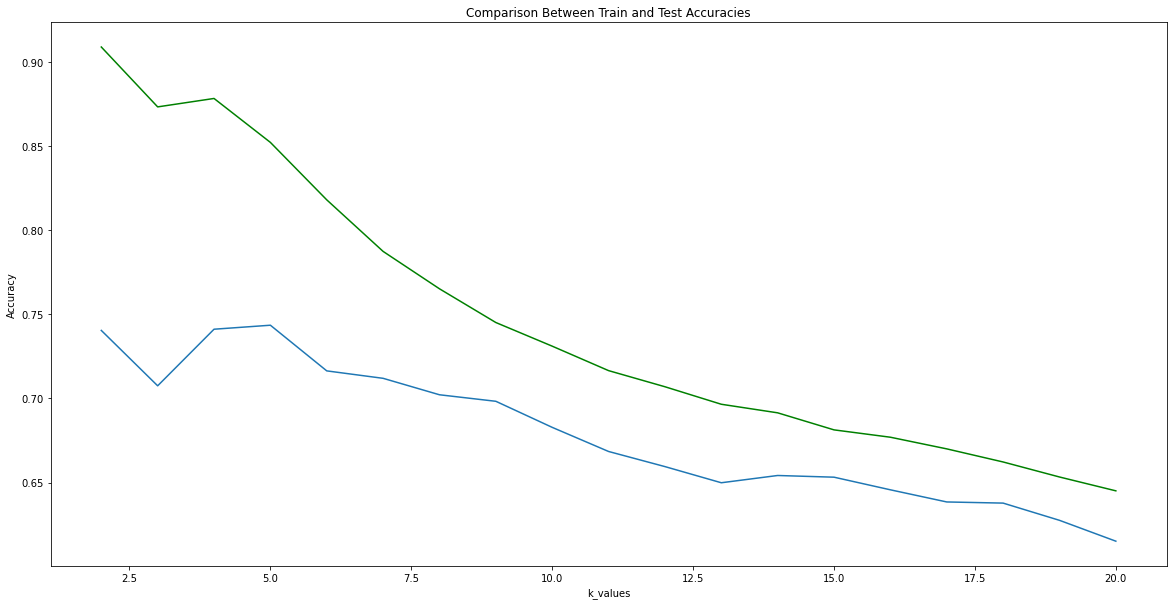

In [51]:
r2_train_list = []
r2_test_list  = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1) # MD
    knn_reg.fit(normal_train_df,y_train)
    ## Training
    r2_train = knn_reg.score(normal_train_df,y_train)
    r2_train_list.append(r2_train)
    
    ## Testing
    r2_test = knn_reg.score(normal_test_df,y_test)
    r2_test_list.append(r2_test)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color = "Green")
plt.plot(k_values,r2_test_list)
plt.xlabel("k_values")
plt.ylabel("Accuracy")
plt.title("Comparison Between Train and Test Accuracies")

Text(0.5, 1.0, 'Comparison Between Train and Test Accuracies')

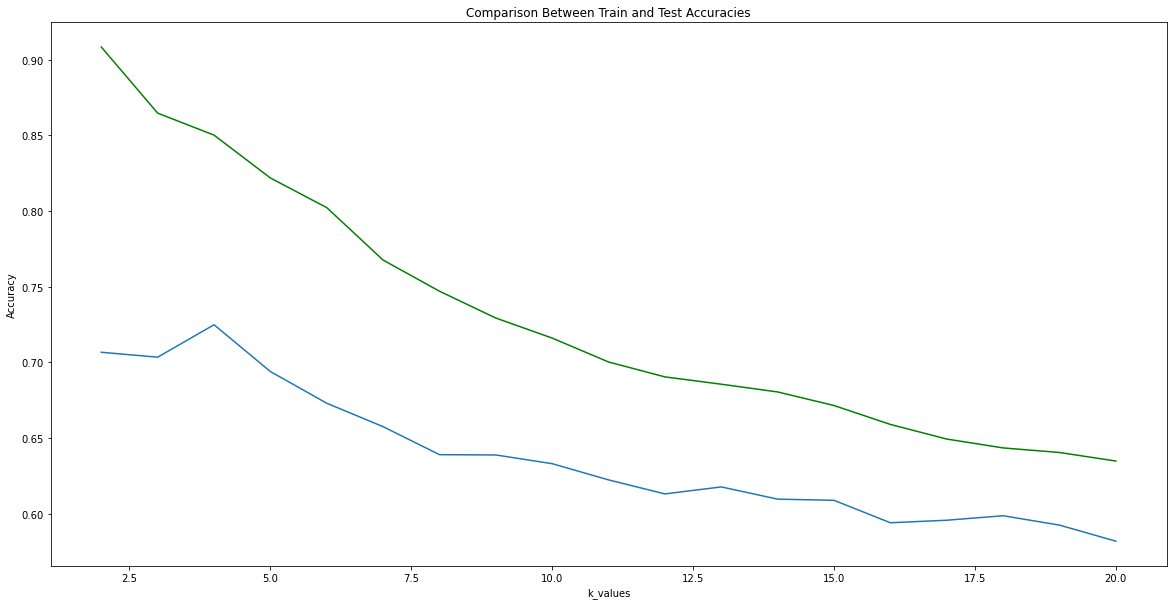

In [52]:
r2_train_list = []
r2_test_list  = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2) # MD
    knn_reg.fit(normal_train_df,y_train)
    ## Training
    r2_train = knn_reg.score(normal_train_df,y_train)
    r2_train_list.append(r2_train)
    
    ## Testing
    r2_test = knn_reg.score(normal_test_df,y_test)
    r2_test_list.append(r2_test)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color = "Green")
plt.plot(k_values,r2_test_list)
plt.xlabel("k_values")
plt.ylabel("Accuracy")
plt.title("Comparison Between Train and Test Accuracies")

## 2) Standardization

In [56]:
std_scalar = StandardScaler()
std_scalar.fit(x_train)
array = std_scalar.transform(x_train)
std_train_df = pd.DataFrame(array,columns=x_train.columns)
std_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.391656,1.411266,-1.130514,-0.263603,-0.998972,0.675110,-1.296413,1.279668,-0.508460,-0.049308,-1.487330,0.341575,-1.121293
1,-0.395575,-0.499530,-1.317449,-0.263603,-0.818000,1.046277,-0.771906,1.080059,-0.739816,-1.107914,0.153633,0.399257,-1.369385
2,-0.388783,1.198955,-0.689883,-0.263603,-0.912795,0.839914,-0.876807,0.222115,-0.624138,-0.915440,-0.362098,0.425870,-1.363714
3,2.203553,-0.499530,1.044457,-0.263603,1.267490,-2.315725,1.123316,-1.116305,1.689422,1.562660,0.856903,0.425870,2.222980
4,-0.169106,-0.499530,1.264031,-0.263603,2.741122,-0.917041,1.123316,-1.092693,-0.508460,-0.019234,-1.721753,-2.242834,0.574235


In [40]:
# StandardScalar -->>Training without hyper parameter tuning
knn_reg = KNeighborsRegressor()
knn_reg.fit(std_train_df,y_train)

y_pred_train = knn_reg.predict(std_train_df)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
print("*"*20)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE",mae)
print("*"*20)
R2_SCORE = r2_score(y_train,y_pred_train)
print("R2_score",R2_SCORE)

MSE 12.590395480225988
********************
MAE 2.207796610169492
********************
R2_score 0.8410100466041945


In [41]:
array = std_scalar.transform(x_test)  # Only do transformation for user input
std_test_df = pd.DataFrame(array,columns=x_test.columns)
# Testing
y_pred_test = knn_reg.predict(std_test_df) # only scaling

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
print("*"*20)

mae = mean_absolute_error(y_test,y_pred_test)
print("MAE",mae)
print("*"*20)
R2_SCORE = r2_score(y_test,y_pred_test)
print("R2_score",R2_SCORE)

MSE 23.17411578947369
********************
MAE 3.184210526315789
********************
R2_score 0.7600683971725885


### Hyperparameter Tuning after standardization

Text(0.5, 1.0, 'Comparison Between Train and Test Accuracies')

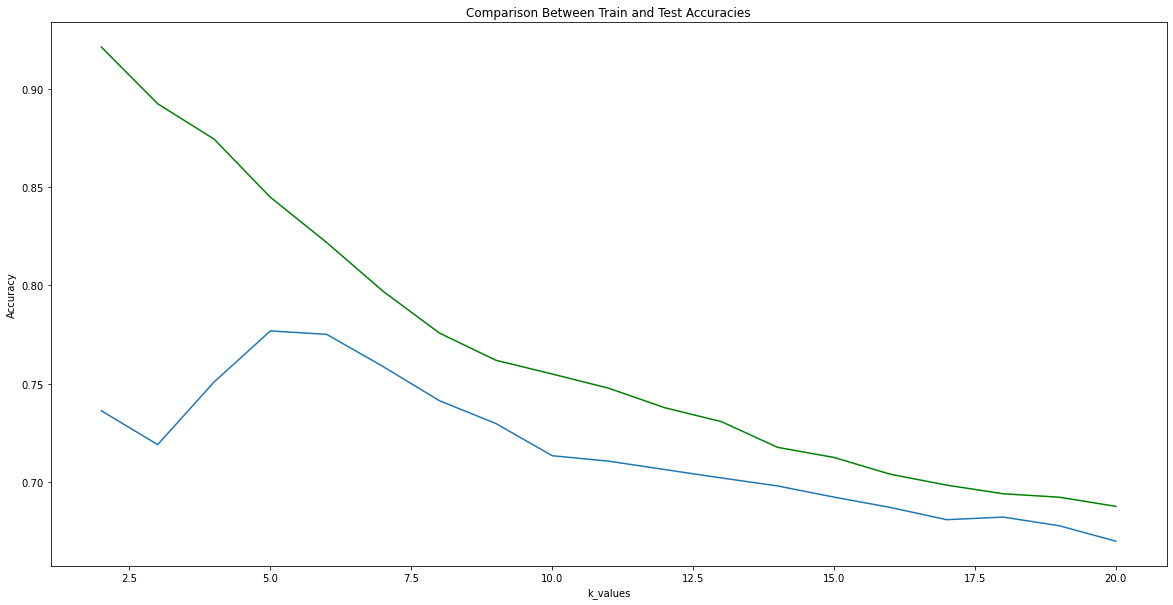

In [42]:
r2_train_list = []
r2_test_list  = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1) # MD
    knn_reg.fit(std_train_df,y_train)
    ## Training
    r2_train = knn_reg.score(std_train_df,y_train)
    r2_train_list.append(r2_train)
    
    ## Testing
    r2_test = knn_reg.score(std_test_df,y_test)
    r2_test_list.append(r2_test)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color = "Green")
plt.plot(k_values,r2_test_list)
plt.xlabel("k_values")
plt.ylabel("Accuracy")
plt.title("Comparison Between Train and Test Accuracies")

Text(0.5, 1.0, 'Comparison Between Train and Test Accuracies')

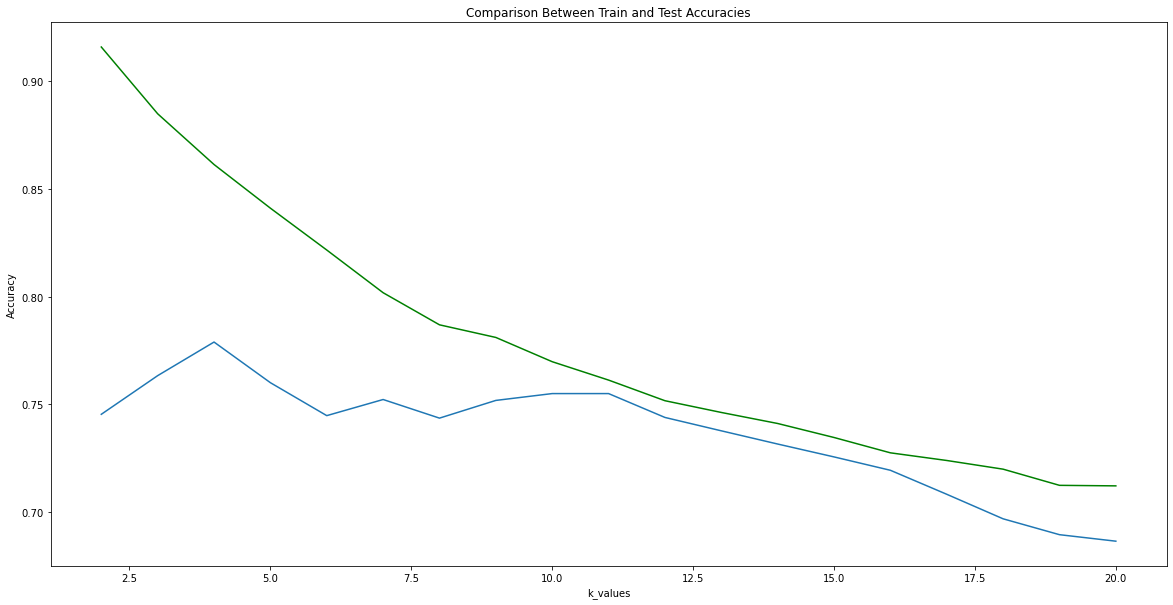

In [43]:
r2_train_list = []
r2_test_list  = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2) # MD
    knn_reg.fit(std_train_df,y_train)
    ## Training
    r2_train = knn_reg.score(std_train_df,y_train)
    r2_train_list.append(r2_train)
    
    ## Testing
    r2_test = knn_reg.score(std_test_df,y_test)
    r2_test_list.append(r2_test)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color = "Green")
plt.plot(k_values,r2_test_list)
plt.xlabel("k_values")
plt.ylabel("Accuracy")
plt.title("Comparison Between Train and Test Accuracies")

In [53]:
knn_reg = KNeighborsRegressor(n_neighbors=6,p=1)
knn_reg.fit(std_train_df,y_train)
# Training
y_pred_train = knn_reg.predict(std_train_df)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
print("*"*20)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE",mae)
print("*"*20)
R2_SCORE = r2_score(y_train,y_pred_train)
print("R2_score",R2_SCORE)

MSE 14.117256748273697
********************
MAE 2.3077212806026366
********************
R2_score 0.8217290317838079


In [54]:
array = std_scalar.transform(x_test)  # Only do transformation for user input
std_test_df = pd.DataFrame(array,columns=x_test.columns)
# Testing
y_pred_test = knn_reg.predict(std_test_df) # only scaling

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
print("*"*20)

mae = mean_absolute_error(y_test,y_pred_test)
print("MAE",mae)
print("*"*20)
R2_SCORE = r2_score(y_test,y_pred_test)
print("R2_score",R2_SCORE)

MSE 21.726789108187134
********************
MAE 3.1948464912280703
********************
R2_score 0.7750531937279632


In [55]:
with open("KNN_REG_MODEL.pkl","wb") as f:
    pickle.dump(knn_reg,f)

In [57]:
with open("Scaling_std.pkl","wb") as f:
    pickle.dump(std_scalar,f)

In [67]:
list(x_test.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [68]:
columns = list(x_test.columns)
data_columns = {"Columns":columns}

In [69]:
with open("Columns_Data.json","w") as f:
    json.dump(data_columns,f)